In [1]:
!uv pip install langgraph

Using Python 3.11.10 environment at: /home/ubu/Documents/work/l4t/ai-python-series/langchain-langgraph-python/.venv
Audited 1 package in 2ms


In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

model = ChatOpenAI(model="gpt-4o", api_key=os.getenv("OPENAI_API_KEY"))

@tool
def get_weather(location: str):
    """Use this to get weather information from a given location."""
    if location.lower() in ["nyc", "new york"]:
        return "It might be cloudy in nyc"
    elif location.lower() in ["sf", "san francisco"]:
        return "It's always sunny in sf"
    else:
        raise AssertionError("Unknown Location")

tools = [get_weather]

memory = MemorySaver()

graph = create_react_agent(model, tools=tools, interrupt_before=["tools"], checkpointer=memory)


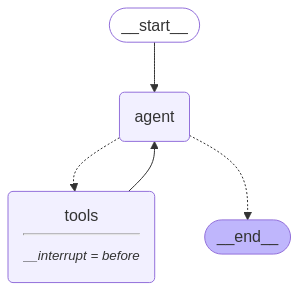

In [4]:

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [5]:
config = {"configurable": {"thread_id": "1"}}

inputs = {"messages": [("user", "what is the weather in SF, CA")]}

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

print_stream(graph.stream(inputs, config=config, stream_mode="values"))

# to check the next state, where it halts 
snapshot = graph.get_state(config)
print("Next step: ", snapshot.next)

print("\n")

# to continue with affirmation 
print_stream(graph.stream(None, config, stream_mode="values"))

================================ Human Message =================================

what is the weather in SF, CA
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_juNEGhzlhPWT7Tx2Xx79RNtb)
 Call ID: call_juNEGhzlhPWT7Tx2Xx79RNtb
  Args:
    location: SF, CA
Next step:  ('tools',)


================================== Ai Message ==================================
Tool Calls:
  get_weather (call_juNEGhzlhPWT7Tx2Xx79RNtb)
 Call ID: call_juNEGhzlhPWT7Tx2Xx79RNtb
  Args:
    location: SF, CA
================================= Tool Message =================================
Name: get_weather

Error: AssertionError('Unknown Location')
 Please fix your mistakes.
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_WD7GeRcqhYW8PUNtxlOAIKe1)
 Call ID: call_WD7GeRcqhYW8PUNtxlOAIKe1
  Args:
    location: San Francisco, CA


In [6]:
config = {"configurable": {"thread_id": "2"}}

inputs = {"messages": [("user", "what is the weather in SF, CA")]}

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

print_stream(graph.stream(inputs, config=config, stream_mode="values"))

# to check the next state, where it halts 
snapshot = graph.get_state(config)
print("Next step: ", snapshot.next)

print("\n")

# to adjust state as per human input and then continue
state = graph.get_state(config)

last_message = state.values["messages"][-1]
last_message.tool_calls[0]["args"] = {"location": "San Francisco"} # instead of directly manipulating, we can use input() to aks input from user 

graph.update_state(config, {"messages": [last_message]})
print_stream(graph.stream(None, config, stream_mode="values"))

================================ Human Message =================================

what is the weather in SF, CA
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_Msfqs53cD5pRMG3xwwbHmoEd)
 Call ID: call_Msfqs53cD5pRMG3xwwbHmoEd
  Args:
    location: SF, CA
Next step:  ('tools',)


================================== Ai Message ==================================
Tool Calls:
  get_weather (call_Msfqs53cD5pRMG3xwwbHmoEd)
 Call ID: call_Msfqs53cD5pRMG3xwwbHmoEd
  Args:
    location: San Francisco
================================= Tool Message =================================
Name: get_weather

It's always sunny in sf
================================== Ai Message ==================================

The weather in San Francisco is described as always sunny! ☀️
